#PROYECTO IA
Pontificia Universidad Javeriana

Autor: José Miguel Torres Aparicio

Fecha: 25-11-2023

Link Video: https://youtu.be/gQiMBOa2T-8

##Probelmatica
Según el Ministerio de Ambiente y Desarrollo Sostenible,en 2022 la industria química farmacéutica en Colombia emitió, 1.2 millones de toneladas de gases contaminantes representando el 2% de las emisiones totales del país.

Al rededor de 2 millones detrabajadores colombianos están expuestos a gases contaminantes en el lugar de trabajo. Por esta razón se realizan distintos sensados de los niveles de gases en el entorno laboral para alertar a los trabajadores si su exposición es damisiado alta.

En estos sensos se implementas distintos sensores, los cuales tienen distintos costos. Uno de los mejores sensores es el MQ135, pero su accesibilidad en cuanto a precio no es la mejor en comparación con otros senores.

Por lo expuesto anteriormente, se plante predecir el valor del sensor mas caro con el uso de los otros sensores para poder sensar un espacio aun mas amplio y tener mayor información del entorno sin sacrificar precisión en las medidas.


##Objetivo General
Este proyecto tiene como objetivo crear un modelo de regresion, con ell cual a partir de satos de sensores de gases de bajo costo se pueda dar el valor de un sensor de mas alto costo.

###Objetivos especificos:
- Realizar el preprocesamiento del conjunto de datos proporcionados por MultimodalGasData.

- Seleccionar varios metodos supervisados para entrenar y validar el modelo de regresion y comparar sus resultados para dar un candidato a un modelo que cumpla los objetivos.

- Realizar una representación y reducción dimensional si se da algún veneficio.

- Seleccionar las métricas de validación del modelo.

## Preprocesamiento

Para empezar se descargan los datos de https://www.kaggle.com/datasets/aryashah2k/multimodal-gas-detection-and-classification/ para obtenerlos. Así mismo, se separan los datos en entrenamiento y testeo con un 80 y 20 pociento de los datos respectivamente. Luego, se realiza una normalización de los datos y esto da paso a aplicar PCA al conjunto ya normalizado.

###Importar datos

In [0]:
import pandas as pd

# Lee el archivo CSV y crea un DataFrame
df = pd.read_csv('Gas_Sensors_Measurements.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Serial Number             6400 non-null   int64 
 1   MQ2                       6400 non-null   int64 
 2   MQ3                       6400 non-null   int64 
 3   MQ5                       6400 non-null   int64 
 4   MQ6                       6400 non-null   int64 
 5   MQ7                       6400 non-null   int64 
 6   MQ8                       6400 non-null   int64 
 7   MQ135                     6400 non-null   int64 
 8   Gas                       6400 non-null   object
 9   Corresponding Image Name  6400 non-null   object
dtypes: int64(8), object(2)
memory usage: 500.1+ KB


Se verifica que el dataset no contenga datos nulos con la información. Como se puede ver el dataset cuanta con 6400 entradas y todas sus columnas no tienen ningun dato en nulo.

In [0]:
#Se verifica que no haya datos duplicados
print("Cantidad total de datos duplicados ", df.duplicated().sum())

Cantidad total de datos duplicados  0


Se verifica que la cantidad de datos duplicados sea nula.

In [0]:
#Se ven el nombre de las columnas
df.columns

Index(['Serial Number', 'MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135',
       'Gas', 'Corresponding Image Name'],
      dtype='object')

In [0]:
#Se importa la libreria necesaria para hacer la separacion de datos en entrenamiento y testeo
from sklearn.model_selection import train_test_split

X = df[['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8']]  # Ajusta las características según tu conjunto de datos
y = df['MQ135']

# Se dividen los datos, 80% entrenamiento; 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Normalizar

In [0]:
from sklearn.preprocessing import StandardScaler

# Se crea el objeto StandardScaler
scaler = StandardScaler()

# Se ajusta el scaler a tus datos de entrenamiento y transforman los datos
X_train_scaled = scaler.fit_transform(X_train)

# Se transforman los datos de prueba usando el mismo scaler
X_test_scaled = scaler.transform(X_test)

### Aplicar PCA

#### Calcular y Visualizar la varianza acumulada

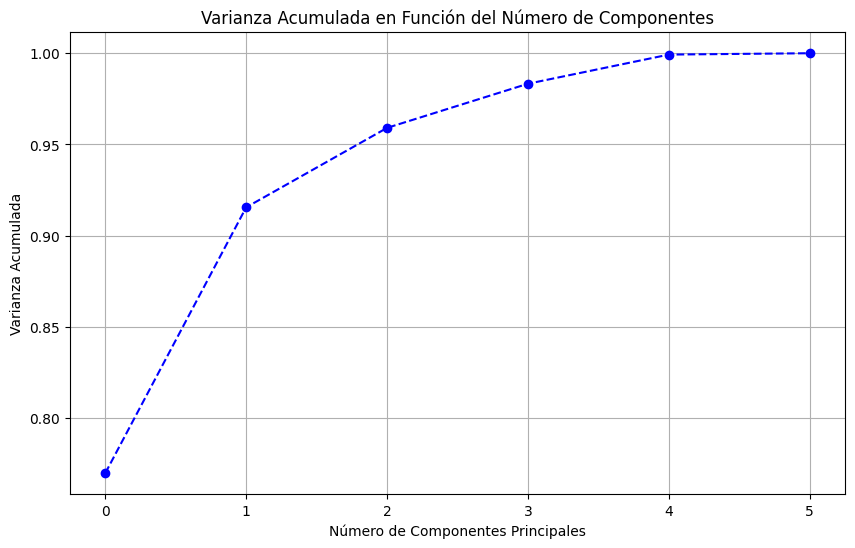

In [0]:
import numpy as np
#Se importa la libreria necesaria para aplicar PCA y para graficar
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)
# Se calcula la varianza acumulada
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Se visualiza la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Varianza Acumulada en Función del Número de Componentes')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.show()

#### Decidir cuantos componentes conservar y ajustar con PCA

A continuación se deciden cuantos componentes conservar, con un 95% de ka varianza y luego se ajustan y transforman los datos con PCA

In [0]:


#Se deciden cuántos componentes conservar (por ejemplo, el 95% de la varianza)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Número de componentes para el 95% de la varianza: {n_components}')


# Se crea una instancia de PCA
pca = PCA(n_components=n_components)  # Se puede ajustar el número de componentes según las necesidades

# Se ajustan y transforman los datos de entrenamiento
X_train_pca = pca.fit_transform(X_train_scaled)

# Se transforman los datos de prueba
X_test_pca = pca.transform(X_test_scaled)

Número de componentes para el 95% de la varianza: 3


##Regresión Lineal

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de regresión lineal
regression_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regression_model.fit(X_train_scaled, y_train)

# Hacer predicciones en los datos de prueba
y_pred = regression_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 260.5172005935714
R2 Score: 0.9545329453624382


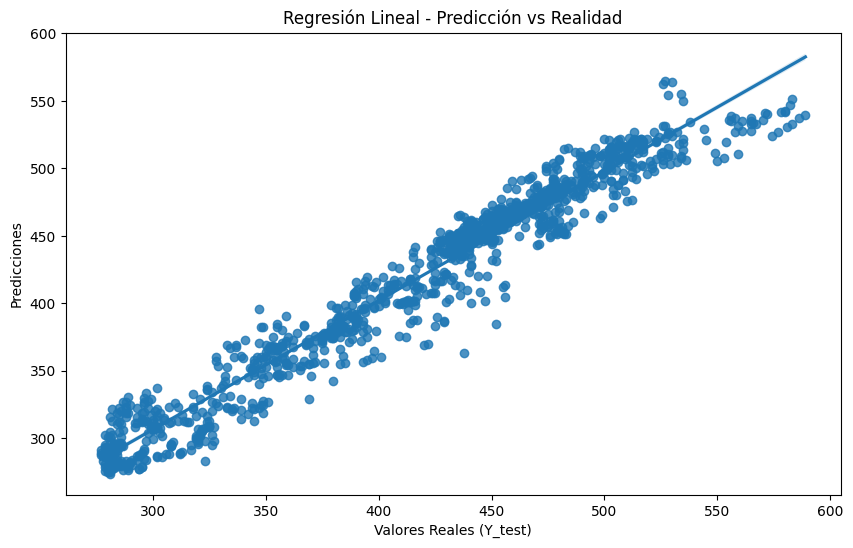

In [0]:
import seaborn as sns
# Crear un DataFrame con las predicciones y los valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Crear una gráfica de regresión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results_df)
plt.title('Regresión Lineal - Predicción vs Realidad')
plt.xlabel('Valores Reales (Y_test)')
plt.ylabel('Predicciones')
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de regresión lineal
regression_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regression_model.fit(X_train_pca, y_train)

# Hacer predicciones en los datos de prueba
y_pred = regression_model.predict(X_test_pca)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 338.8939792164151
R2 Score: 0.940854150765223


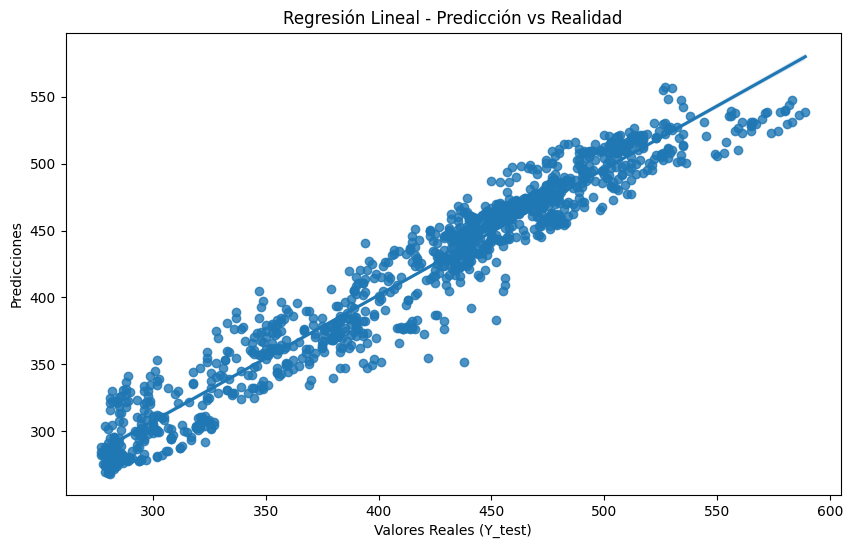

In [0]:
import seaborn as sns
# Crear un DataFrame con las predicciones y los valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Crear una gráfica de regresión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results_df)
plt.title('Regresión Lineal - Predicción vs Realidad')
plt.xlabel('Valores Reales (Y_test)')
plt.ylabel('Predicciones')
plt.show()

Al comparar los resultados obtenidos aplicando solo la normalización y la adición de PCA, se puede observar que se obtienen mejores resultados sin aplicar el PCA.

#Lasso

In [0]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Definir los valores de alpha que deseas probar
alphas = [0.01, 0.1, 1.0, 10.0]

# Crear una instancia del modelo Lasso
lasso_model = Lasso()

# Configurar la búsqueda de cuadrícula
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda de cuadrícula en tus datos
grid_search.fit(X_train_scaled, y_train)

# Ver los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
best_lasso_model = grid_search.best_estimator_

Mejores hiperparámetros: {'alpha': 0.01}


In [0]:
# Crea una instancia del modelo Lasso
lasso_model = Lasso(alpha=0.01)  # Puedes ajustar el hiperparámetro alpha según sea necesario

# Entrena el modelo
lasso_model.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = lasso_model.predict(X_test_scaled)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 260.57916800255566
R2 Score: 0.9545221304313564


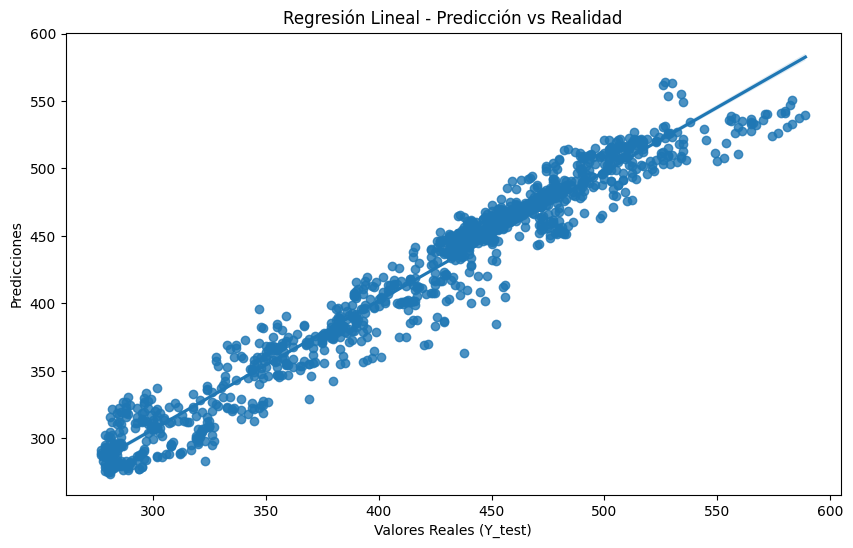

In [0]:
import seaborn as sns
# Crear un DataFrame con las predicciones y los valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Crear una gráfica de regresión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results_df)
plt.title('Regresión Lineal - Predicción vs Realidad')
plt.xlabel('Valores Reales (Y_test)')
plt.ylabel('Predicciones')
plt.show()

#Regresión polinomica

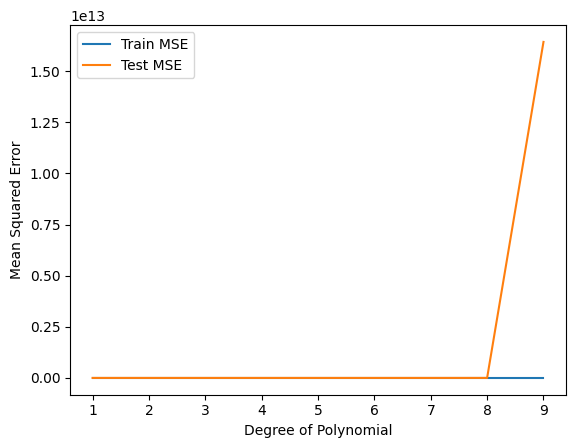

In [0]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
degrees = range(1, 10)
train_mse = []
test_mse = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

plt.plot(degrees, train_mse, label='Train MSE')
plt.plot(degrees, test_mse, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [0]:
# Grado del polinomio
degree = 5  # Puedes ajustar esto según sea necesario

# Crear instancias de PolynomialFeatures y LinearRegression
poly_features = PolynomialFeatures(degree=degree)
linear_regression = LinearRegression()

# Transformar las características a características polinómicas
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Ajustar el modelo de regresión lineal a las características polinómicas
linear_regression.fit(X_train_poly, y_train)

# Predecir en el conjunto de prueba
y_pred = linear_regression.predict(X_test_poly)

# Métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 62.43305448113167
R2 Score: 0.9891038016191798


Se obtuvieron los siguientes resultados:
- Polinomio grado 3:
  - Mean Squared Error: 71.26264411688813
  - R2 Score: 0.9875628076522498
- Polinomio grado 4:
  - Mean Squared Error: 50.3395513042283
  - R2 Score: 0.9912144337327253
- Polinomio grado 5:
  - Mean Squared Error: 62.43305448113167
  - R2 Score: 0.9891038016191798

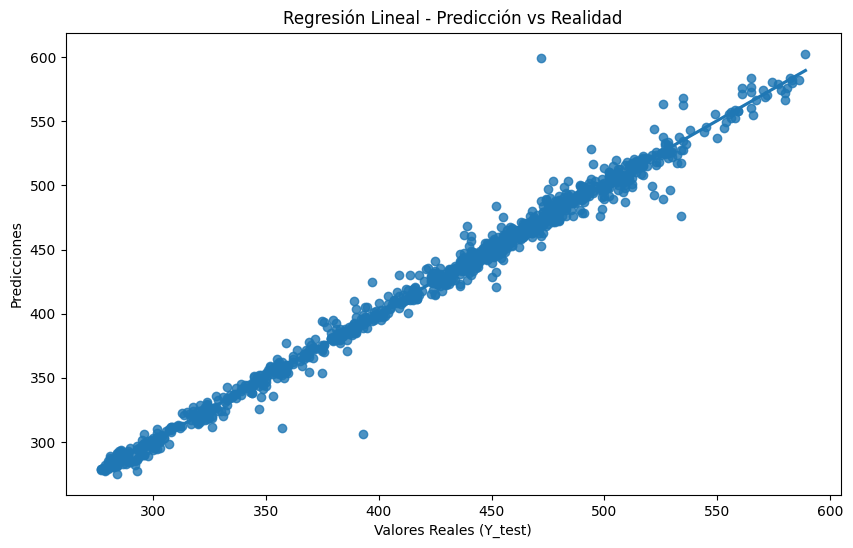

In [0]:
import seaborn as sns
# Crear un DataFrame con las predicciones y los valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Crear una gráfica de regresión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results_df)
plt.title('Regresión Lineal - Predicción vs Realidad')
plt.xlabel('Valores Reales (Y_test)')
plt.ylabel('Predicciones')
plt.show()

#Random Forest Regresor

In [0]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 29.912764425271497
R2 Score: 0.9947794414672599


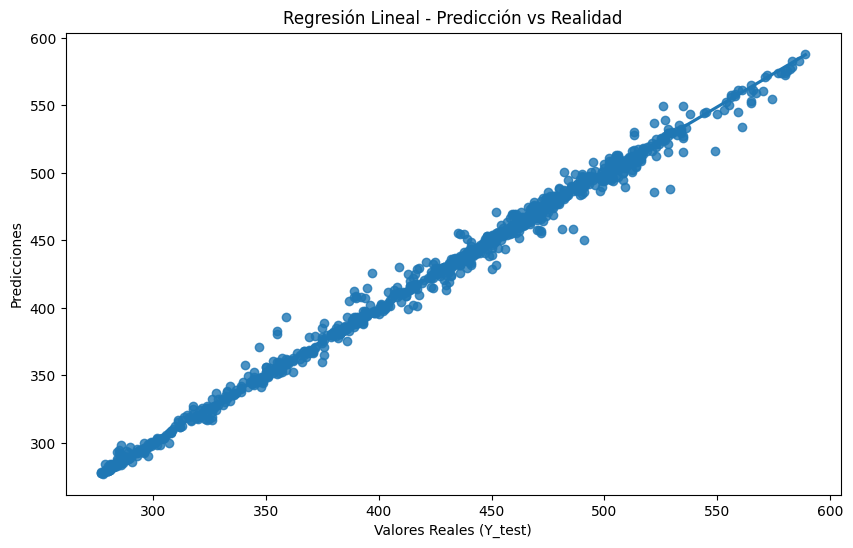

In [0]:
import seaborn as sns
# Crear un DataFrame con las predicciones y los valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Crear una gráfica de regresión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results_df)
plt.title('Regresión Lineal - Predicción vs Realidad')
plt.xlabel('Valores Reales (Y_test)')
plt.ylabel('Predicciones')
plt.show()

#Super Vector Regressor

In [0]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')  # Puedes experimentar con diferentes kernels
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
# Métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 196.12127194768664
R2 Score: 0.9657717165434119


Resultados para los distintos kernels:

LINEAR:
- Mean Squared Error: 265.04556645760056
- R2 Score: 0.9537426272656307


RBF:
- Mean Squared Error: 196.12127194768664
- R2 Score: 0.9657717165434119

POLY:
- Mean Squared Error: 636.5668478635554
- R2 Score: 0.8889024617709368

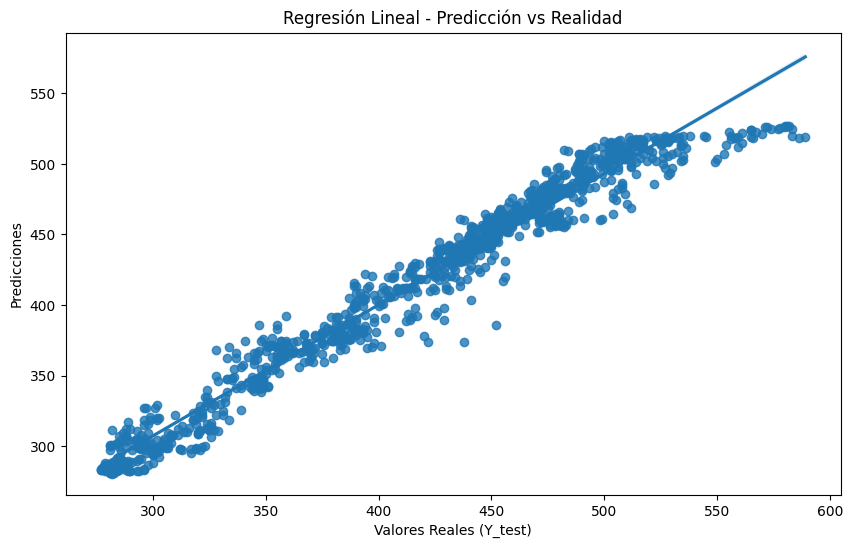

In [0]:
import seaborn as sns
# Crear un DataFrame con las predicciones y los valores reales
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Crear una gráfica de regresión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results_df)
plt.title('Regresión Lineal - Predicción vs Realidad')
plt.xlabel('Valores Reales (Y_test)')
plt.ylabel('Predicciones')
plt.show()

##Resumen de Resultados

Regresión lineal:
- Mean Squared Error: 260.5172005935714
- R2 Score: 0.9545329453624382

Lasso:
- Mean Squared Error: 260.57916800255566
- R2 Score: 0.9545221304313564

Regresión Polinomial grado 5:
- Mean Squared Error: 62.43305448113167
- R2 Score: 0.9891038016191798

Random Forest Regressor:
- Mean Squared Error: 29.912764425271497
- R2 Score: 0.9947794414672599

Super Vector Regressor kernel rbf:
- Mean Squared Error: 196.12127194768664
- R2 Score: 0.9657717165434119

##Conclusiones:

- El conjunto de datos no se ve beneficiado en la reduccion dimensional, y esto se puede ver en la comparación de los resultados sin y con la reducción.

- El modelo de aprendizaje de maquina que tuvo mejores resultados fue el Random Forest Regressor con un R2 de 0.994. Esto con los parametros base.

- Es importante tener en cuenta los parametros iniciales de los modelos ya que como se pudo observar con los resultados, estos afectan como responde el modelo significativamente.